In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("datasets/wine.csv", encoding='utf-8')

train_df.isnull().sum()

Unnamed: 0                      0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

# Limpeza dos Dados
A base não possui células vazias. Entretanto, a base possui uma coluna 'Unnamed: 0' refente aos 'indices' que pode ser retirada pois não precisar ser analizada.

In [3]:
train_df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
train_df = train_df._get_numeric_data()

## A base não possui colunas textuais
Sendo assim não se faz necessária transformações

# Analisando os Dados
Foram plotados histogramas para melhor entender a frequencia dos valores de cada classe.

12.37    6
13.05    6
12.08    5
12.29    4
12.00    3
        ..
13.34    1
13.69    1
13.90    1
13.84    1
13.75    1
Name: Alcohol, Length: 126, dtype: int64


<AxesSubplot:ylabel='Frequency'>

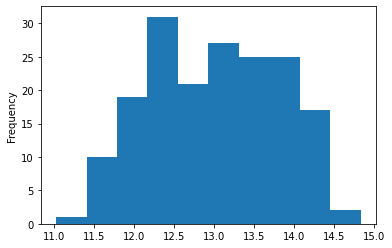

In [5]:
print(train_df['Alcohol'].value_counts())
train_df['Alcohol'].plot(kind='hist')

É peceptivel pelo histograma acima que a maior parte das amostras de alcool está entre 12.0 e 14.0.

1.73    7
1.81    4
1.67    4
1.68    3
1.61    3
       ..
3.45    1
2.51    1
4.61    1
3.83    1
2.68    1
Name: Malic_acid, Length: 133, dtype: int64


<AxesSubplot:ylabel='Frequency'>

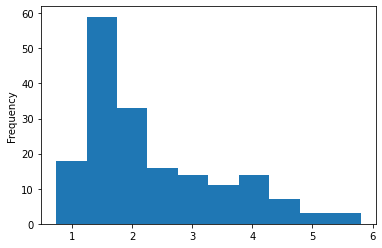

In [6]:
print(train_df['Malic_acid'].value_counts())
train_df['Malic_acid'].plot(kind='hist')

Neste existe um pico nas amostras de aproximadamente 1.3 e 1.9.

2.30    7
2.28    7
2.70    6
2.36    6
2.32    6
       ..
2.16    1
2.78    1
2.53    1
1.71    1
1.95    1
Name: Ash, Length: 79, dtype: int64


<AxesSubplot:ylabel='Frequency'>

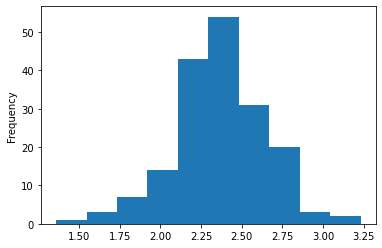

In [7]:
print(train_df['Ash'].value_counts())
train_df['Ash'].plot(kind='hist')

Neste percebemos um crescimento até  aproximadamente 2.3 e declinio a partir de aproximadamente 2.4.

20.0    15
21.0    11
16.0    11
18.0    10
19.0     9
        ..
19.4     1
11.2     1
21.6     1
18.1     1
14.8     1
Name: Alcalinity_of_ash, Length: 63, dtype: int64


<AxesSubplot:ylabel='Frequency'>

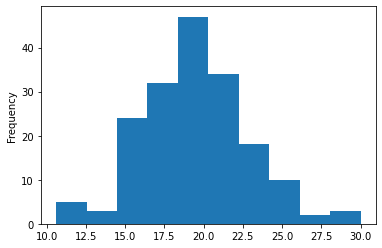

In [8]:
print(train_df['Alcalinity_of_ash'].value_counts())
train_df['Alcalinity_of_ash'].plot(kind='hist')

Ao analisar este histograma percebe-se que existe um pequeno declinio antes do crescimento e logo após decrescer. Nota-se também, um pico mais evidente onde tem maior quantidade de amostras entre aproximadamente 17.6 e 20.0. 

88     13
86     11
101     9
98      9
96      8
102     7
112     6
94      6
85      6
97      5
80      5
92      5
103     5
89      5
90      4
108     4
107     4
106     4
120     3
118     3
116     3
87      3
100     3
84      3
111     3
110     3
78      3
104     3
95      3
105     2
93      2
113     2
91      2
115     2
82      1
81      1
162     1
99      1
151     1
117     1
119     1
121     1
122     1
123     1
124     1
126     1
127     1
128     1
132     1
134     1
136     1
139     1
70      1
Name: Magnesium, dtype: int64


<AxesSubplot:ylabel='Frequency'>

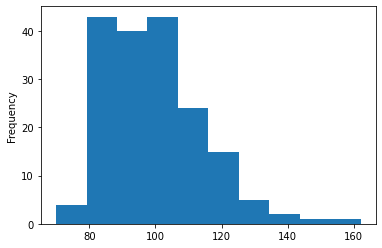

In [9]:
print(train_df['Magnesium'].value_counts())
train_df['Magnesium'].plot(kind='hist')

Fica claro que existe uma concentração das amostras entre 80 à 105.

2.20    8
3.00    6
2.80    6
2.60    6
2.00    5
       ..
2.90    1
2.02    1
3.27    1
2.83    1
1.93    1
Name: Total_phenols, Length: 97, dtype: int64


<AxesSubplot:ylabel='Frequency'>

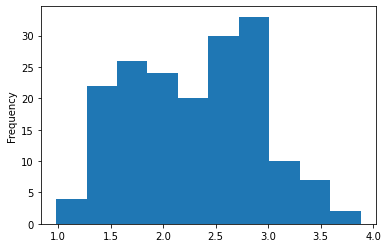

In [10]:
print(train_df['Total_phenols'].value_counts())
train_df['Total_phenols'].plot(kind='hist')

Existem oscilações no gráfico, entretanto é bastante perceptivel que as amostras estão concentradas entre aproximadamente 1.4 e 2.9.

2.65    4
0.58    3
2.68    3
0.60    3
1.25    3
       ..
2.78    1
1.02    1
1.30    1
2.90    1
3.25    1
Name: Flavanoids, Length: 132, dtype: int64


<AxesSubplot:ylabel='Frequency'>

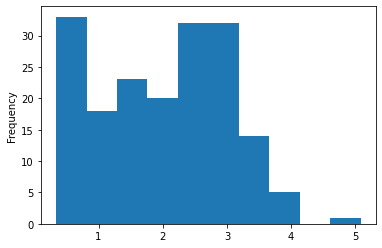

In [11]:
print(train_df['Flavanoids'].value_counts())
train_df['Flavanoids'].plot(kind='hist')

O que chama mais atenção neste histograma é que percebemos que não existem amostras de aproximadamente 4.1 até 4.5.

0.26    11
0.43    11
0.29    10
0.32     9
0.30     8
0.37     8
0.34     8
0.27     8
0.40     8
0.24     7
0.53     7
0.21     6
0.22     6
0.28     5
0.39     5
0.17     5
0.50     5
0.52     5
0.47     4
0.42     4
0.48     4
0.63     4
0.58     3
0.60     3
0.45     3
0.61     3
0.14     2
0.19     2
0.25     2
0.20     2
0.31     2
0.55     1
0.41     1
0.66     1
0.56     1
0.13     1
0.44     1
0.33     1
0.35     1
Name: Nonflavanoid_phenols, dtype: int64


<AxesSubplot:ylabel='Frequency'>

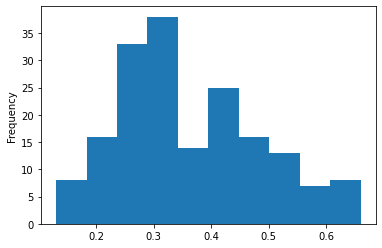

In [12]:
print(train_df['Nonflavanoid_phenols'].value_counts())
train_df['Nonflavanoid_phenols'].plot(kind='hist')

O gráfico possui dois picos de crescimento das amostras o primeiro em aproximadamente 0.25 até 0.3 e o segundo entre aproximadamente 0.39 e 0.4.

1.35    9
1.46    7
1.87    6
1.25    5
1.56    4
       ..
1.53    1
0.68    1
1.72    1
1.71    1
0.88    1
Name: Proanthocyanins, Length: 101, dtype: int64


<AxesSubplot:ylabel='Frequency'>

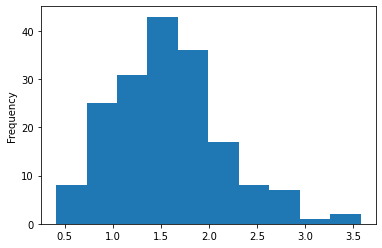

In [13]:
print(train_df['Proanthocyanins'].value_counts())
train_df['Proanthocyanins'].plot(kind='hist')

A maior parte das amostras está concentrada entre 0.55 e 1.9 aproximadamente.

2.60    4
4.60    4
3.80    4
3.40    3
3.05    3
       ..
3.21    1
6.90    1
7.80    1
5.20    1
6.75    1
Name: Color_intensity, Length: 132, dtype: int64


<AxesSubplot:ylabel='Frequency'>

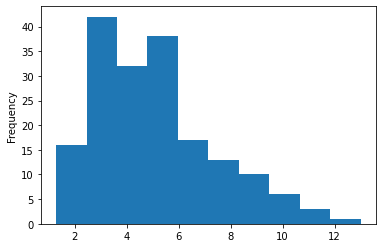

In [14]:
print(train_df['Color_intensity'].value_counts())
train_df['Color_intensity'].plot(kind='hist')

A maior parte das amostras estão entre 2.6 e 5.9 aproximadamente, em seguida o número de amostras vai diminuindo.

1.04    8
1.23    7
1.12    6
0.89    5
0.57    5
       ..
1.17    1
0.55    1
0.76    1
1.22    1
0.69    1
Name: Hue, Length: 78, dtype: int64


<AxesSubplot:ylabel='Frequency'>

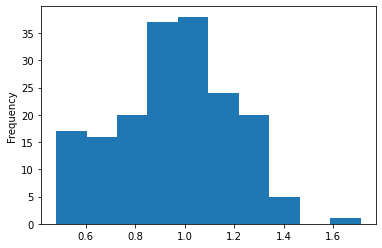

In [15]:
print(train_df['Hue'].value_counts())
train_df['Hue'].plot(kind='hist')

Da mesma forma que o histograma de Flavanoids, percebemos neste a falta de amostras de 1.46 e 1.59 aproximadamente.

2.87    5
3.00    4
1.82    4
2.78    4
2.77    3
       ..
3.31    1
3.69    1
2.01    1
1.96    1
2.73    1
Name: OD280/OD315_of_diluted_wines, Length: 122, dtype: int64


<AxesSubplot:ylabel='Frequency'>

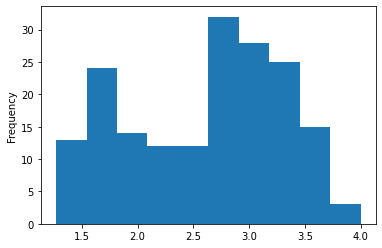

In [16]:
print(train_df['OD280/OD315_of_diluted_wines'].value_counts())
train_df['OD280/OD315_of_diluted_wines'].plot(kind='hist')

Percebe-se neste que possue mais amostras de 1.55 à 1.80 aproximadamente, assim como de 2.60 à 3.40 aproximadamente.

680     5
520     5
630     4
625     4
750     4
       ..
385     1
1020    1
392     1
720     1
502     1
Name: Proline, Length: 121, dtype: int64


<AxesSubplot:ylabel='Frequency'>

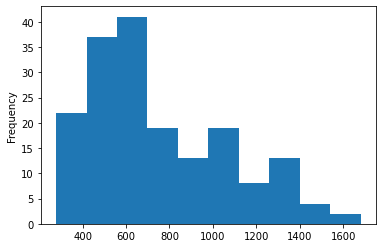

In [17]:
print(train_df['Proline'].value_counts())
train_df['Proline'].plot(kind='hist')

Nota-se que a maior parte das amostras de Proline estão entre 420 e 640 aproximadamente.

# Verificando presença de Outliers
Foi possivel constatar a presença de poucos outliers nas classes, estes não chegaram a comprometer nenhuma delas.

<AxesSubplot:title={'center':'Alcohol'}>

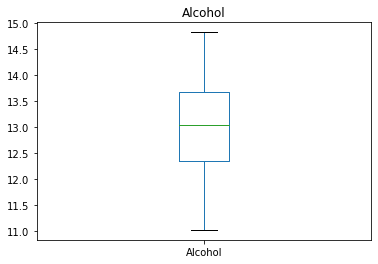

In [18]:
train_df['Alcohol'].plot(kind='box', title='Alcohol')

<AxesSubplot:title={'center':'Malic_acid'}>

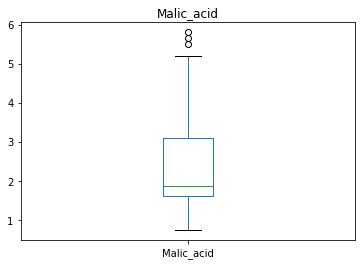

In [19]:
train_df['Malic_acid'].plot(kind='box', title='Malic_acid')

<AxesSubplot:title={'center':'Ash'}>

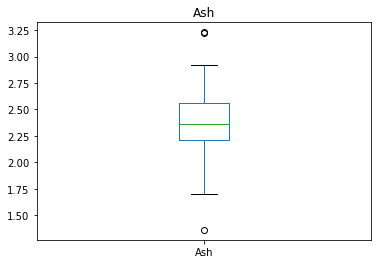

In [20]:
train_df['Ash'].plot(kind='box', title='Ash')

<AxesSubplot:title={'center':'Alcalinity_of_ash'}>

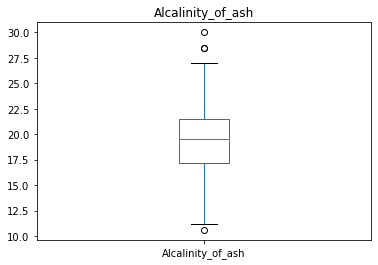

In [21]:
train_df['Alcalinity_of_ash'].plot(kind='box', title='Alcalinity_of_ash')

<AxesSubplot:title={'center':'Magnesium'}>

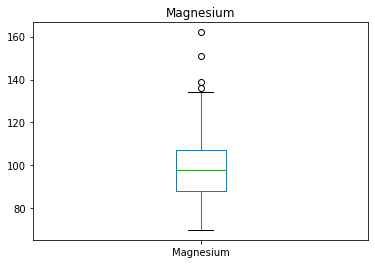

In [22]:
 train_df['Magnesium'].plot(kind='box', title='Magnesium')

<AxesSubplot:title={'center':'Total_phenols'}>

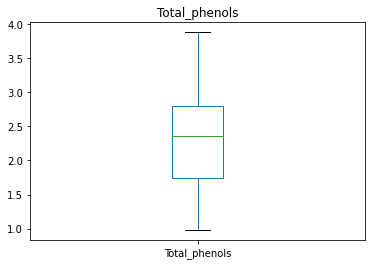

In [23]:
train_df['Total_phenols'].plot(kind='box', title='Total_phenols')

<AxesSubplot:title={'center':'Flavanoids'}>

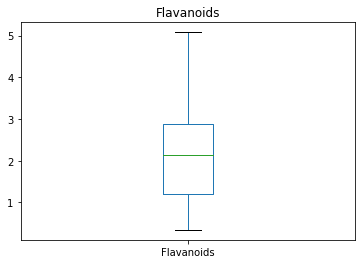

In [24]:
train_df['Flavanoids'].plot(kind='box', title='Flavanoids')

<AxesSubplot:title={'center':'Nonflavanoid_phenols'}>

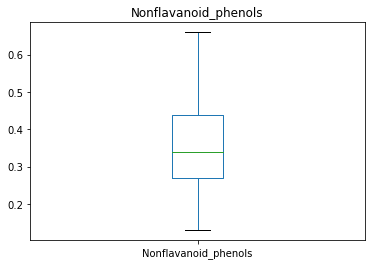

In [25]:
train_df['Nonflavanoid_phenols'].plot(kind='box', title='Nonflavanoid_phenols')

<AxesSubplot:title={'center':'Proanthocyanins'}>

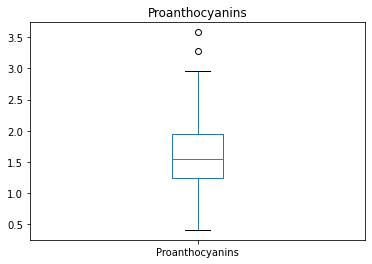

In [26]:
train_df['Proanthocyanins'].plot(kind='box', title='Proanthocyanins')

<AxesSubplot:title={'center':'Color_intensity'}>

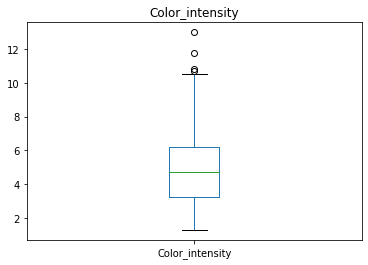

In [27]:
train_df['Color_intensity'].plot(kind='box', title='Color_intensity')

<AxesSubplot:title={'center':'Hue'}>

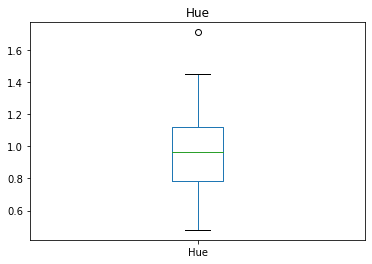

In [28]:
train_df['Hue'].plot(kind='box', title='Hue')

<AxesSubplot:title={'center':'OD280/OD315_of_diluted_wines'}>

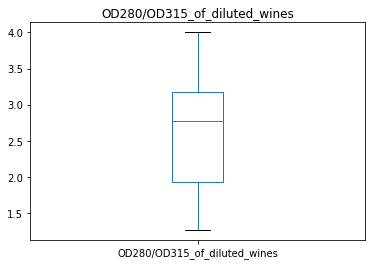

In [29]:
train_df['OD280/OD315_of_diluted_wines'].plot(kind='box', title='OD280/OD315_of_diluted_wines')

<AxesSubplot:title={'center':'Proline'}>

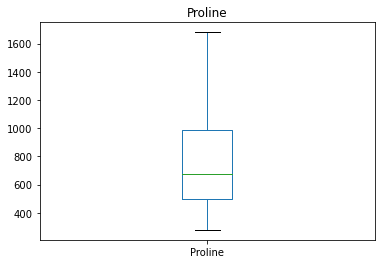

In [30]:
train_df['Proline'].plot(kind='box', title='Proline')

# Matriz de Correlação
Através da matriz de correlação foi possivel constatar uma correlação forte entre as colunas 'Total_phenols' e 'Flavanoids', 'Flavanoids' e 'OD280/OD315_of_diluted_wines', assim como  'Magnesium' e 'OD280/OD315_of_diluted_wines'. As demais colunas possuiram correlações moderadas ou fracas.

In [31]:
correlation_col = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
df = pd.DataFrame(train_df[correlation_col])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


# Normalização dos Dados

In [32]:
norm_df = preprocessing.Normalizer().fit_transform(train_df)

# K-means
O K-Means é um algoritmo de clusterização (ou agrupamento) disponível na biblioteca Scikit-Learn. É um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características.

Este foi analisado através da métrica silhueta. Q foi utilizada para calcular o coeficiente de silhueta médio de todas as amostras. Usando a distância média intra-cluster e a distância média mais próxima do cluster para cada amostra. O melhor valor é 1 e o pior valor é -1.  Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois há clusters que possuem elementos que se assemelham mais a esta.

In [33]:
iters = [1, 10, 100]
k_values = [2, 5, 10]

print("BRUTE DATA:\n") 

for k in k_values:
    print("K =", k)
    for i in iters:
        kmeans_model = KMeans(n_clusters = k, max_iter=i, random_state=0)
        kmeans_model.fit_predict(train_df)

        labels = kmeans_model.labels_
        print("{i} - silhouette with max_iter:".format(i=i), metrics.silhouette_score(train_df, labels, metric='euclidean'))

    print("#################################################")

print("\nNORMALIZED DATA:\n")    

for k in k_values:
    print("K =", k)
    for i in iters:
        kmeans_model = KMeans(n_clusters = k, max_iter=i, random_state=0)
        kmeans_model.fit_predict(norm_df)

        labels = kmeans_model.labels_
        print("{i} - silhouette with max_iter:".format(i=i), metrics.silhouette_score(norm_df, labels, metric='euclidean'))

    print("##################################################")

BRUTE DATA:

K = 2
1 - silhouette with max_iter: 0.655521358978658
10 - silhouette with max_iter: 0.6568536504294317
100 - silhouette with max_iter: 0.6568536504294317
#################################################
K = 5
1 - silhouette with max_iter: 0.5471149220130406
10 - silhouette with max_iter: 0.5489993239795681
100 - silhouette with max_iter: 0.5489993239795681
#################################################
K = 10
1 - silhouette with max_iter: 0.5077953618313522
10 - silhouette with max_iter: 0.5187886561561684
100 - silhouette with max_iter: 0.5187886561561684
#################################################

NORMALIZED DATA:

K = 2
1 - silhouette with max_iter: 0.53662226606861
10 - silhouette with max_iter: 0.5381503708882504
100 - silhouette with max_iter: 0.5381503708882504
##################################################
K = 5
1 - silhouette with max_iter: 0.491334353443085
10 - silhouette with max_iter: 0.4939024982435685
100 - silhouette with max_iter: 0.4939024

No K-means usando a métrica silhueta foi possivel constatar que os resultados foram melhores quando foram considerados 2 clusters como saída tanto nos dados brutos quanto normalizados, 0.656 e 0.537 respectivamente. Desse modo, temos que 2 é o melhor valor para K, baseado na silhueta. 

Outro ponto a ser destacado é que valor máximo de iterações no K-Means entre 1, 10 e 100, não teve grande mudança nos resultados sendo a maior delas com K=10 de valor máximo de iterações de 1 = 0.51 e valor máximo de iterações de 10 e 100 = 0.52.

# Hierárquico (Agglomerative Clustering)
Utilização do algoritmo não supervisionado Hierárquico, como o nome sugere, é um algoritmo que constrói a hierarquia de clusters. Esse algoritmo começa com todos os pontos de dados atribuídos a um cluster próprio. Em seguida, dois clusters mais próximos são mesclados no mesmo cluster. No final, esse algoritmo termina quando há apenas um único cluster.

Este algoritmo também foi analisado através da métrica silhueta.

In [34]:
linkages = ['ward', 'complete', 'average', 'single']

print("BRUTE DATA:\n") 

for k in k_values:
    print("K =", k)
    for link in linkages:
        ac_model = AgglomerativeClustering(n_clusters=k, linkage=link)
        ac_model.fit_predict(train_df)

        ac_labels = ac_model.labels_
        print("{i} - silhouette with linkage:".format(i=link), metrics.silhouette_score(train_df, ac_labels, metric='euclidean'))
    print("##################################################")

print("\nNORMALIZED DATA:\n")   

for k in k_values:
    print("K =", k)
    for link in linkages:
        ac_model = AgglomerativeClustering(n_clusters=k, linkage=link)
        ac_model.fit_predict(norm_df)

        ac_labels = ac_model.labels_
        print("{i} - silhouette with linkage:".format(i=link), metrics.silhouette_score(norm_df, ac_labels, metric='euclidean'))
    print("##################################################")

BRUTE DATA:

K = 2
ward - silhouette with linkage: 0.6587292996216912
complete - silhouette with linkage: 0.6413290429696278
average - silhouette with linkage: 0.6587292996216912
single - silhouette with linkage: 0.5393938960075036
##################################################
K = 5
ward - silhouette with linkage: 0.5074843044233789
complete - silhouette with linkage: 0.4806117357066238
average - silhouette with linkage: 0.545816566301081
single - silhouette with linkage: -0.026278424991670837
##################################################
K = 10
ward - silhouette with linkage: 0.5217812922193543
complete - silhouette with linkage: 0.5127855272002829
average - silhouette with linkage: 0.502473319482436
single - silhouette with linkage: 0.20159438328593499
##################################################

NORMALIZED DATA:

K = 2
ward - silhouette with linkage: 0.5365826498495794
complete - silhouette with linkage: 0.5317187487677043
average - silhouette with linkage: 0.539954

No Hierárquico usando a métrica silhueta foi possivel constatar que os melhores resultados foram usando `linkage = 'ward'`. é possível notar que com K = 5, houveram atribuições erradas, tendo em vista que o valor da silhueta quando `linkage = 'single'`.